# Final project

## 1.Motivation 
 * ###### What is your dataset? <br>

The data set we choose is the UK traffic accident data from 2009 to 2014. There are 899987 rows, and 37 attributes in this data set. In this dataset, each data points contains information such as the geolocation of the accident, the time of the incidence, number of casualties, road and weather condition, etc. 

 * ###### Why did you choose this/these particular dataset(s)?<br>

According to the world health organization, traffic accidents is one of the leading cause of death among people age between 15 and 29.[See reference] We all understand the pain of a family losing a young life. Furthermore, a report from Danish Road Traffic Accident Investigation Board (AIB), suggests that besides the human error such as drunk or drug driving and the unpredictable natural condition, the design and the condition of the road also can be factors caused accidents.[See reference] In the age of data, people are learning and exploring the pattern from the big data to optimize our living conditions. This dataset has relatively large data entries, and extended attributes can be analyzed. That's the reason we picked this dataset. 

 * ###### What was your goal for the end user's experience?<br>

In this data visualization project we would like to create a reader-driven narrative, give the reader freedom to interact with the dataset, mainly the map based on the geolocation for all data points. Ideally, the reader might find patterns and significant events by modifying different filtering combinations, and find answers for some hypothesis such as: Most accidents happened on Friday nights? Most severe accidents happened along the highway?<br>
Hopefully, our visualization can help the reader to answer some questions 

## 2.Basic Stats
* ###### Write about your choices in data cleaning and preprocessing<br>

The original dataset contains data from 2006 to 2014, 1.6 million data entries in total, due to the gist file hosting size limitation, and the data from 2008 was missing, so we decide to use the continuous data from 2009 - 2014, removed data from 2006 and 2007. [See reference] <br> 
Moreover, when we try to plot the basic status of the data, we spotted that the number of accidents in 2012 is significantly higher than other years. This abnormal distribution caused our attention, after the team goes through the blog post comments, we found out that the data from 2012 has duplication, around 3000 duplicated data points, by running remove duplication function in python the dataset finalized on 899987 rows. <br> 
The size of the dataset is 220MB which is way beyond the hosting limit for gist, and for python it also takes significant computational time. So for different part of the assignment, the team generate a seperate dataset from the master dataset based on the demand. <br>

   * Map <br>
   To plot the map we used three main files: a geoJsonfile, a csv file containing all the accidents and a csv file containing the population of the different districts. 
   Since all the districts in the accident data did not fit into the districts in the geoJson file, we ran an algorithm to check the position of each point to determine what polygon from the geoJson it fit into and assigned them a name corresponding to the map. 
   To map the population of each district to the geoJson file, we first merged the accident data and population data together and created a column for normalized data. Unfortunately we did not find a dataset that contained the population of all the districts, therefore some of the areas on the map is left empty when the normalized radio button is ticked 'on'.
   To ease implementation when clicking around on the map, four seperate files where generated from the accidents dataset to show the four barcharts at the bottom.
   The data generation and cleaning process can be seen in the ipython data cleaning files in Github 
   * Weather and road surface Condition <br>
    In these two columns, there are 35866 rows involved "Unknown" and "Other" value, compare to the total size of the data its about 3%. However, the user can not read out valuable information from those two values, so the team decides to remove the rows having "Unknown" and "Other" value for the weather and road surface condition analysis. <br>
   * Reverse Geocoding, Preparation for Brushing and Scatter Plot
   We have applied reverse geocoding in order to get the location such as county and city from the pairs of geographic coordinates in our dataset. We have then prepared the datasets for brushing. The dataset consist of following two dataframes for the conditions (weather, speed, light and road condition) in ten most populous counties in UK<br>
   * Data per county
   This dataset consists of the number of accidents per county under a certain condition. There are columns for each condition per county which includes the number of accidents and also there is a column for total that represents the total number of accidents in that county<br>
   * Data per county per year
    This dataset consists of the number of accidents per county under a certain condition for the years 2009 to 2014. This dataset has columns for each condition per county per year, and as well as the column for total number of accidents.<br>
   In order to make the notebook readible to the audience, the data preparation for speed limit is only included in the notebook. It should be noted that the data for the other conditions is also prepared in the exact same way.The data generation and cleaning process can be seen in the ipython data cleaning files in Github 
    

* ###### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis. <br>

In this part of the project, the data status is seperated to 3 main parts. Data related to different weather condition,data related to time, and data related to particular road. In summary, most of the accident across 6 years happened under "Fine without high winds, Dry" condition. Further more, the number of accidents is decreasing from 2009 - 2013, but 2014 shows a significant increase. From a narrower perspective, most accidents happened om saturday, the least on monday; morning and afternoon rash hours have the highest acciident rate compared to the other time of the day. Moreover, accidents are more often occusre in the city area, for both urban and rorual area the'Givway and uncontrolled area' occurrd most accidnets.  


In [1]:
import csv 
import pandas as pd
import os
from IPython.display import Image
from pytz import timezone
from datetime import datetime
from datetime import timedelta

In [2]:
df = pd.read_csv("CleanData_UK_Accidents.csv")

In [41]:
df_original = pd.read_csv("CleanData_UK_Accidents.csv")
df = df_original.copy()

In [3]:
df.shape[0]

899987

In [4]:
df.shape[1]

37

In [5]:
df=df.drop_duplicates()

## All about the weather
In this part of the explainer notebook, we will start by analyzing all six years of data, trying to find some significant pattern. <br>
Firstly, start with one of the most common factors causing traffic accidents--weather<br>        

In [6]:
remove = ['Unknown','Other']
df = df[~df.Weather_Conditions.isin (remove)]
df = df[~df.Road_Surface_Conditions.isin (remove)]

In [7]:
# find the combinations of weather and the road surface condition
weather_road_surface_condition = df[['Weather_Conditions', 'Road_Surface_Conditions']].copy()
# find the number of different combination
print("Different weather and road surface condition combinations: %d" %weather_road_surface_condition.drop_duplicates().shape[0] )

#Frequency of the number of different combination
df3 = (df.groupby(['Weather_Conditions','Road_Surface_Conditions']).size().reset_index().rename(columns={0:'count'}))

df3['Category'] = df3['Weather_Conditions'].str.cat(df3['Road_Surface_Conditions'],sep=",")

df3 = df3.drop(['Weather_Conditions', 'Road_Surface_Conditions'], axis=1)

df3.sort_values("count", inplace = True, ascending = False) 
df3

Different weather and road surface condition combinations: 44


,count,Category
5,598144,"Fine without high winds,Dry"
9,109041,"Fine without high winds,Wet/Damp"
24,102151,"Raining without high winds,Wet/Damp"
7,13531,"Fine without high winds,Frost/Ice"
19,11718,"Raining with high winds,Wet/Damp"
0,6346,"Fine with high winds,Dry"
33,4999,"Snowing without high winds,Snow"
4,3902,"Fine with high winds,Wet/Damp"
14,3218,"Fog or mist,Wet/Damp"
32,1698,"Snowing without high winds,Frost/Ice"


Text(0.5, 1.0, 'Accident occurance based on weather and road surface condition')

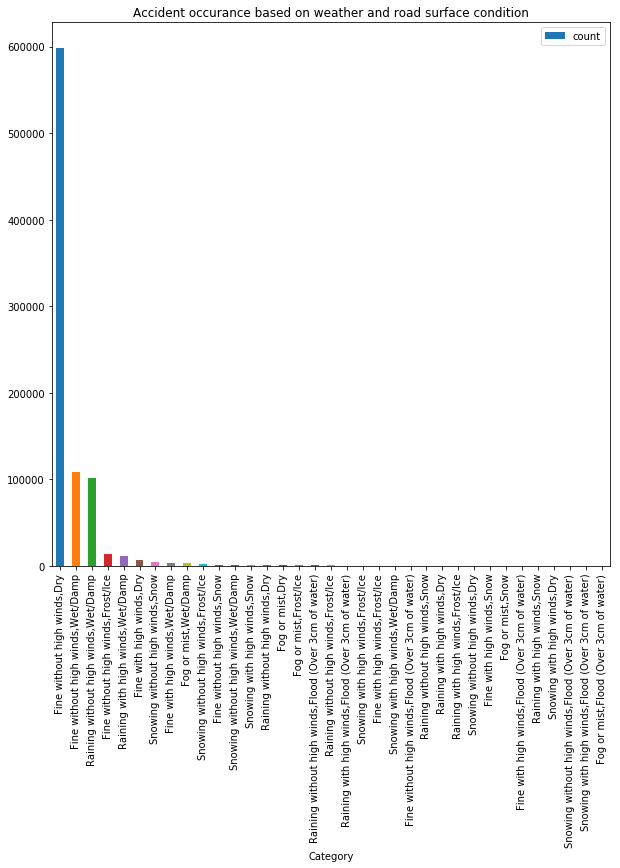

In [8]:
%matplotlib inline  
import matplotlib.pyplot as plt
# kind is a function specificly for pandas plot
df3.plot(kind='bar',x='Category',y='count',figsize=(10,10))
plt.title("Accident occurance based on weather and road surface condition")

## Accidents in days
Continuing from the weather, as aforementioned that drivers' mental and physical status might be a factor causing the accident. So in this part of the notebook, we will focus on the day of the week, and day of the month, trying to find is Friday night has the most accidents. 

In [9]:
#accidents for all 6 years
df_year = df['Year'].value_counts().reset_index()
df_year.sort_values("index", inplace = True, ascending = True) 
df_year = pd.DataFrame(df_year, columns= ['index', 'Year'])

Text(0.5, 1.0, 'Accident occurance based on Year')

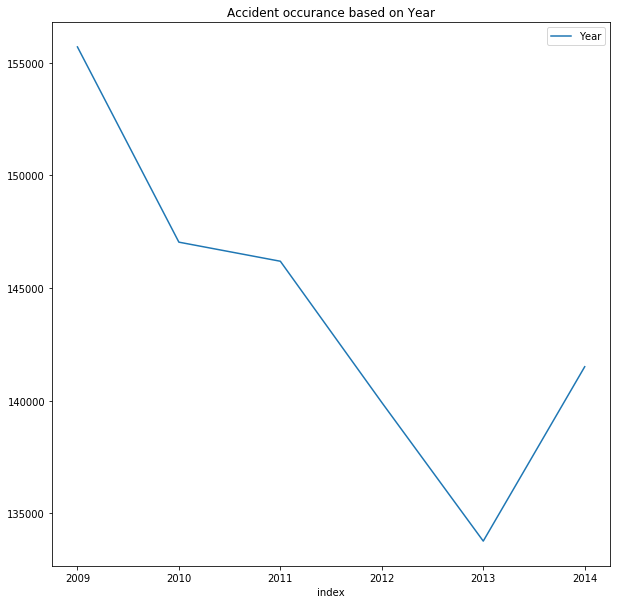

In [10]:
%matplotlib inline  
import matplotlib.pyplot as plt
# kind is a function specificly for pandas plot
df_year.plot(kind='line',x='index',y='Year',figsize=(10,10))
plt.title("Accident occurance based on Year")

In general, the total occurrence of the accident is decreasing, but compared to 2013, 2014 shows an increase.

In [11]:
accident_count_day = df.Day_of_Week.value_counts().reset_index()
accident_count_day.sort_values("index", inplace = True, ascending = True) 
df4 = pd.DataFrame(accident_count_day, columns= ['index', 'Day_of_Week'])

Text(0.5, 1.0, 'Accident occurance based on day of the week')

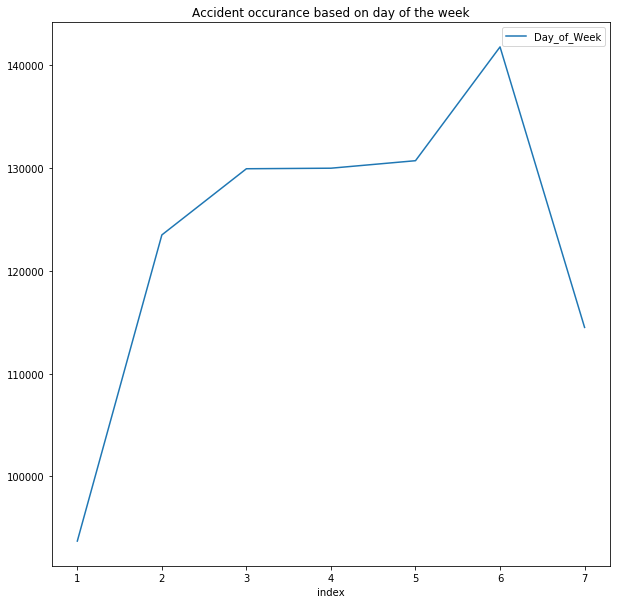

In [12]:
%matplotlib inline  
import matplotlib.pyplot as plt
# kind is a function specificly for pandas plot
df4.plot(kind='line', x='index', y='Day_of_Week',figsize=(10,10))
plt.title("Accident occurance based on day of the week")

In this dataset, the column "Day of the week" is written in index number. In some part of the world, the first day of a week is Sunday, to avoid confusion the team followed the standard in the UK, which is the first day of the week starts with Monday.[See reference] 
From this line graph we can see from all six years of data, Monday has the least traffic accidents, Saturday has the most, almost 50% higher than Monday. 

In [13]:
# seperate the data into hours
df['Hour'] = df.Time.str.slice(0,2)

In [14]:
accident_hour = df.Hour.value_counts().reset_index()
accident_hour.sort_values("index", inplace = True, ascending = True) 
df_accident_hour = pd.DataFrame(accident_hour, columns= ['index', 'Hour'])

Text(0.5, 1.0, 'Accident occurance based on Time of the day')

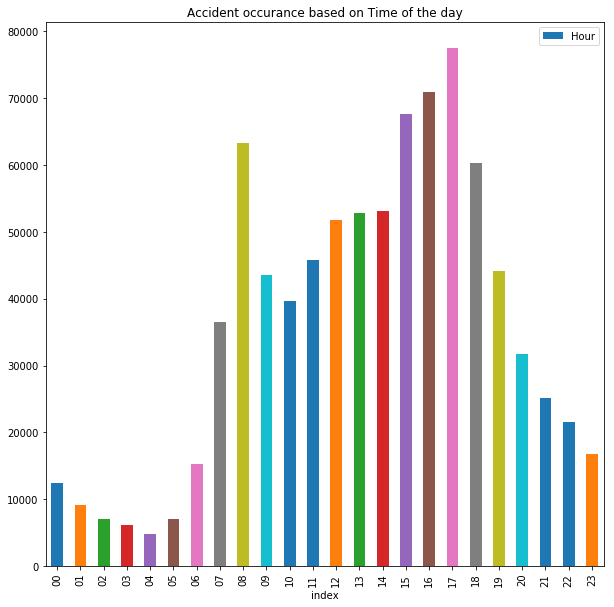

In [15]:
%matplotlib inline  
import matplotlib.pyplot as plt
# kind is a function specificly for pandas plot
df_accident_hour.plot(kind='bar', x='index', y='Hour',figsize=(10,10))
plt.title("Accident occurance based on Time of the day")

From the hourly view, most accidents happened during the morning and afternoon rush hour, in particular, 8 o'clock and 17 o'clock 

Text(0, 0.5, 'Count')

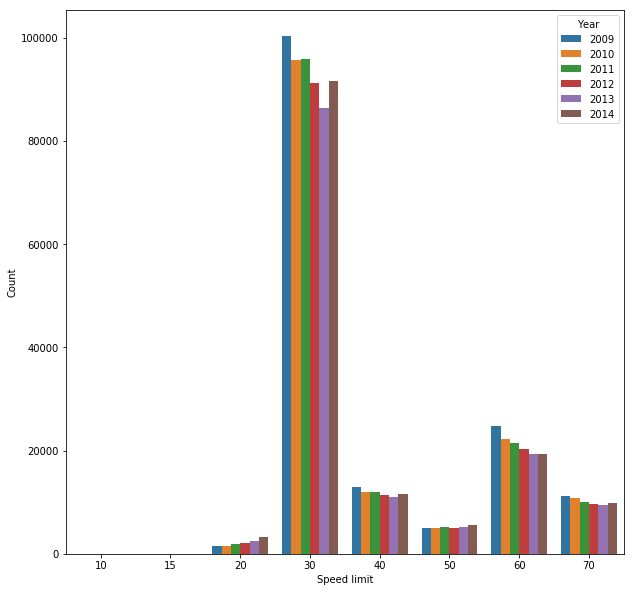

In [16]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)

x="Speed_limit"
sns.countplot(x, hue="Year", data=df)
plt.xlabel('Speed limit')
plt.xticks(rotation=0)
plt.ylabel('Count')


## About roads
Besides weather and road conditions, facilities on the road also a factor of traffic accidents, especially for the urban area, where the population is denser than the rural area. For example, in the metropolitan area, most accidents occurred on uncontrolled single carriageway, when involving pedestrians, most accidents happened around the road with no zebra line or traffic light. 

In [17]:
# Most accident happened in the urban area
df9 = (df.groupby(['1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Junction_Control','Road_Type','Speed_limit']).size().reset_index().rename(columns={0:'count'}))
df9 = df9.loc[(df9['1st_Road_Class'] != 6) & (df9['2nd_Road_Class'] != 6)]
df9 = df9.loc[(df9['Speed_limit'] == 30)]
df9 = df9.sort_values('count', ascending=False)
df9[:10]

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Junction_Control,Road_Type,Speed_limit,count
88149,5,0,5,0,Giveway or uncontrolled,Single carriageway,30,2279
88136,5,0,5,0,Automatic traffic signal,Single carriageway,30,895
88146,5,0,5,0,Giveway or uncontrolled,Roundabout,30,554
5387,3,10,5,0,Automatic traffic signal,Single carriageway,30,256
3217,3,4,3,4,Automatic traffic signal,Single carriageway,30,166
4049,3,5,5,0,Automatic traffic signal,Single carriageway,30,141
24579,3,205,5,0,Automatic traffic signal,Single carriageway,30,134
8053,3,23,5,0,Automatic traffic signal,Single carriageway,30,126
5627,3,11,5,0,Giveway or uncontrolled,Single carriageway,30,124
5393,3,10,5,0,Giveway or uncontrolled,Single carriageway,30,121


In [18]:
# Most accident happened outside the urban area
df10 = (df.groupby(['1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Junction_Control','Road_Type','Speed_limit']).size().reset_index().rename(columns={0:'count'}))
df10 = df10.loc[(df10['1st_Road_Class'] != 6) & (df10['2nd_Road_Class'] != 6)]
df10 = df10.loc[(df10['Speed_limit'] != 30)]
df10 = df10.sort_values('count', ascending=False)
df10[:10]


,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Junction_Control,Road_Type,Speed_limit,count
10,1,1,1,1,Giveway or uncontrolled,Dual carriageway,70,272
522,1,6,1,6,Giveway or uncontrolled,Dual carriageway,70,140
6380,3,14,3,14,Giveway or uncontrolled,Dual carriageway,70,111
2154,3,1,3,1,Giveway or uncontrolled,Dual carriageway,70,105
923,1,25,1,25,Giveway or uncontrolled,Dual carriageway,70,95
15,1,1,1,1,Giveway or uncontrolled,Slip road,70,75
9892,3,34,3,34,Giveway or uncontrolled,Dual carriageway,70,71
263,1,4,1,4,Giveway or uncontrolled,Dual carriageway,70,65
1863,2,1,2,1,Giveway or uncontrolled,Dual carriageway,70,65
1183,1,40,1,40,Giveway or uncontrolled,Dual carriageway,70,64


In [19]:
#  Pedestrian_Crossing-Physical_Facilities different condition
df['Pedestrian_Crossing-Physical_Facilities'].value_counts().reset_index()

,index,Pedestrian_Crossing-Physical_Facilities
0,No physical crossing within 50 meters,708566
1,Pedestrian phase at traffic signal junction,61891
2,non-junction pedestrian crossing,48119
3,Zebra crossing,25224
4,Central refuge,17578
5,Footbridge or subway,2743


By filtering and mapping the road class and road number, we can identify accidents on each road. For example, in the example below, we identified the M1 motorway, which is from London to Leeds. The number of accidents is decreasing from 2009 - 2013, a small increase in 2014. 
Moreover, when the accident happened at the non-junction area, Single carriageway has about six times more accidents compared to a dual carriageway. Continuous with the single carriageway, there is a considerable difference between facilitated with or without automatic traffic signal; furthermore single carriageway also caused most of the casualties. 

In [20]:
#find all accidnets happened on motorway M1 
df11 = df.loc[(df['1st_Road_Class'] == 1) & (df['2nd_Road_Class'] == 1)]
df11 = df11.Year.value_counts().reset_index()
df11 = df11.sort_values('index', ascending=True)
df11

,index,Year
1,2009,422
0,2010,440
2,2011,400
3,2012,391
5,2013,340
4,2014,368


In [21]:
df12 = df.loc[(df['1st_Road_Class'] == df['2nd_Road_Class'])]
df12 = df.Road_Type.value_counts().reset_index()
df12 = df12.sort_values('Road_Type', ascending=False)
df12

,index,Road_Type
0,Single carriageway,650389
1,Dual carriageway,125023
2,Roundabout,59165
3,One way street,17167
4,Slip road,9069
5,Unknown,3308


In [22]:
# In all single carriageway condition, the accidents
df13 = df.loc[(df['Road_Type'] == 'Single carriageway')]
df13 = (df13.groupby(['Road_Surface_Conditions','Weather_Conditions','Junction_Control','Speed_limit']).size().reset_index().rename(columns={0:'count'}))
df13 = df13.sort_values('count', ascending=False)
df13[0:10]

,Road_Surface_Conditions,Weather_Conditions,Junction_Control,Speed_limit,count
29,Dry,Fine without high winds,Giveway or uncontrolled,30,189872
23,Dry,Fine without high winds,Automatic traffic signal,30,40934
293,Wet/Damp,Raining without high winds,Giveway or uncontrolled,30,29773
245,Wet/Damp,Fine without high winds,Giveway or uncontrolled,30,29007
32,Dry,Fine without high winds,Giveway or uncontrolled,60,23584
30,Dry,Fine without high winds,Giveway or uncontrolled,40,13057
288,Wet/Damp,Raining without high winds,Automatic traffic signal,30,6418
248,Wet/Damp,Fine without high winds,Giveway or uncontrolled,60,5632
240,Wet/Damp,Fine without high winds,Automatic traffic signal,30,5556
31,Dry,Fine without high winds,Giveway or uncontrolled,50,4511


In [23]:
# In urban area
df14 = (df.groupby(['Pedestrian_Crossing-Physical_Facilities','Speed_limit','Road_Type','Light_Conditions','Time']).size().reset_index().rename(columns={0:'count'}))
df14 = df14.sort_values('count', ascending=False)
df14 = df14.loc[(df14['Speed_limit'] <= 30)]
df14[0:10]

,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Road_Type,Light_Conditions,Time,count
20599,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,15:30,3626
20629,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,16:00,3346
20569,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,15:00,3163
20179,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,08:30,2917
20689,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,17:00,2792
20659,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,16:30,2769
20449,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,13:00,2667
20509,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,14:00,2621
20719,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,17:30,2500
20209,No physical crossing within 50 meters,30,Single carriageway,Daylight: Street light present,09:00,2495


In [24]:
# what caused most casualties?
df16 = df.loc[(df['Number_of_Casualties'] >=1)]
df16 = df16.loc[(df16['Speed_limit'] <= 30)]
df16["Pedestrian_Crossing-Physical_Facilities"].value_counts().reset_index()

,index,Pedestrian_Crossing-Physical_Facilities
0,No physical crossing within 50 meters,435342
1,Pedestrian phase at traffic signal junction,55273
2,non-junction pedestrian crossing,43001
3,Zebra crossing,24544
4,Central refuge,13969
5,Footbridge or subway,1551


## 3.Data Analysis
* ###### Describe your data analysis and explain what you've learned about the dataset.<br>

From the comparison between each year's data, the overall distribution of the data is similar. In general, the number of incidents under all different conditions fits the graph from the section above. In all analysis graphs, 2009 has the highest number, 2013 has the lowest, such as the accidents in hours, days of the week, or in particular date in the month, different weather and road conditions. <br>
From this analysis section, we can see that Saturday has the most accidents across all six years of data, on the other hands Monday has the lowest. During the day, most accidents happened during the morning and afternoon rush hour around 8 o'clock and 17 o'clock. In most cities in the UK the speed limit is 30 mph, and this is the reason from the graph, 30 mph area has the most accidents. However, 20 mph zone, the number of accidents has a significant decrease compared to 30 mph. So the assumption could be when the speed limit is 30, then maybe an automatic junction control system is recommended.<br>

* ###### Significant findings.<br>

A recent event from EU committee that the EU vote on removing the Daylight Saving (DST) [See reference] , this inspired the group looks into the DST impact on traffic accidents. From python timezone library, use package pytz, the team extracted all DST days between 2009 - 2014, which are 12 data points in total, and DST always happens on the last Sunday of March and October. Considering the traffic density during the weekend is lower than the weekdays, to balance the density difference, the team decides to compare the DST weekend with one week before and after accident data. 


## Accidents for each year in different parameter

In [25]:
df["month"] = df.Date.str.slice(3,5)#when slicing the date, the year became a string, in order to filter it, need to convert it back to int
df["month"] = df["month"].astype(int)
df["day"]= df.Date.str.slice(0,2)
df["day"] = df["day"].astype(int)
df['Hour'] = df.Time.str.slice(0,2)

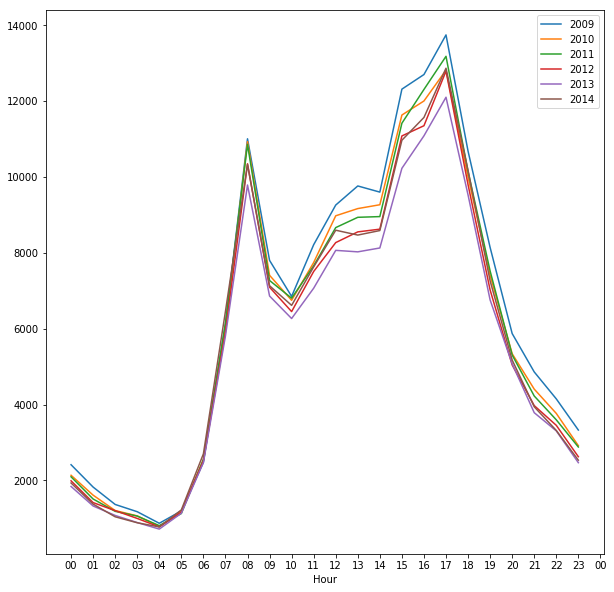

In [26]:
xaxis=df['Hour'].unique().tolist()
Year_Hourly=df.groupby(["Year", "Hour"]).size().reset_index(name="Count")
Year_Hourly.set_index('Hour', inplace=True)
Year_Hourly.groupby('Year')['Count'].plot(figsize=(10,10))
plt.xlabel('Hour')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xticks(list(range(len(xaxis))),Year_Hourly.index, rotation= 0)

value='Hour'
x=df[value].unique().tolist()

Text(0.5, 0, 'Day_of_Week')

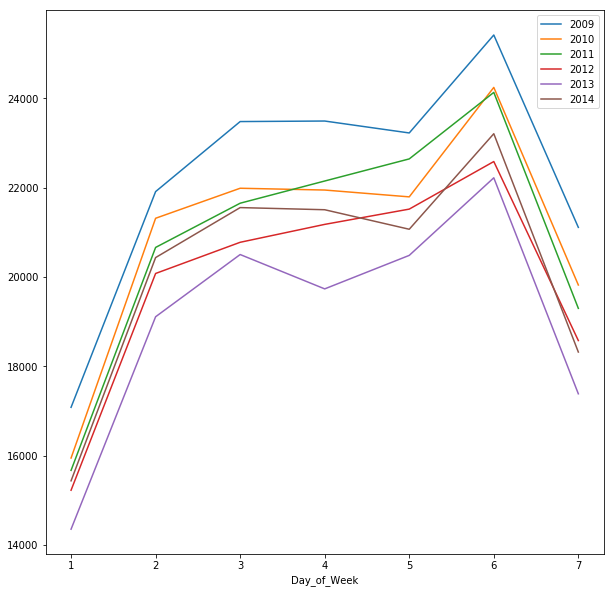

In [27]:
value='Day_of_Week'
xaxis=df[value].unique().tolist()
dayOfWeek_Yearly=df.groupby(["Year", value]).size().reset_index(name="Count")
dayOfWeek_Yearly.set_index(value, inplace=True)
dayOfWeek_Yearly.groupby('Year')['Count'].plot(figsize=(10,10),legend=True)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel(value)

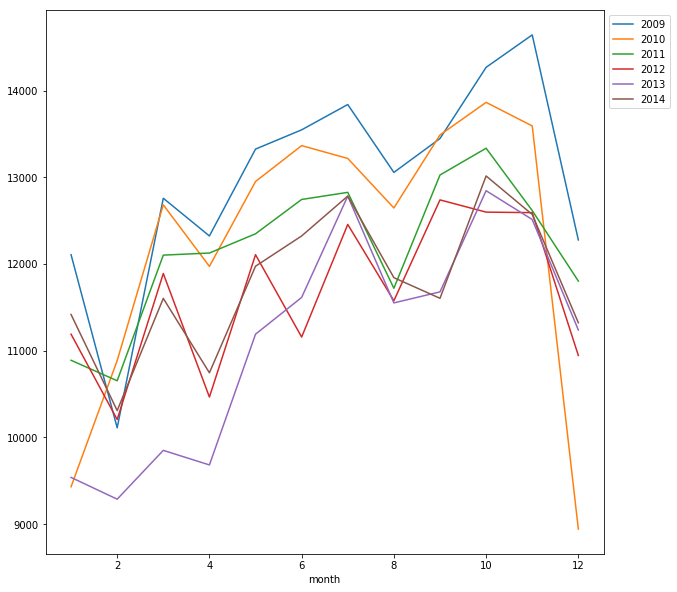

In [28]:
# the month doesnt make sense actually, casue the 31/30 is different, maybe change it to season make more sense. 
value='month'
xaxis=df[value].unique().tolist()
month_Yearly=df.groupby(["Year", value]).size().reset_index(name="Count")
month_Yearly.set_index(value, inplace=True)
month_Yearly.groupby('Year')['Count'].plot(figsize=(10,10),legend=True)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

Text(0, 0.5, 'Count')

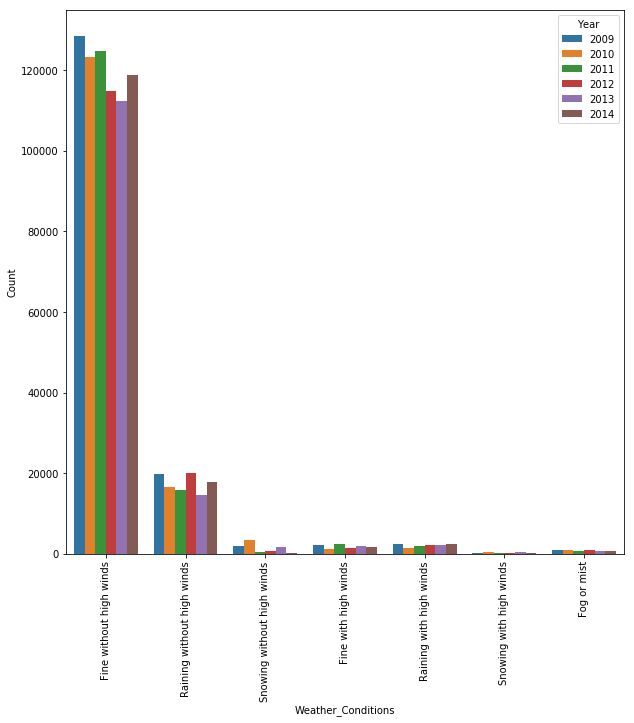

In [29]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)

x="Weather_Conditions"
sns.countplot(x, hue="Year", data=df)
plt.xlabel('Weather_Conditions')
plt.xticks(rotation=90)
plt.ylabel('Count')


Text(0, 0.5, 'Count')

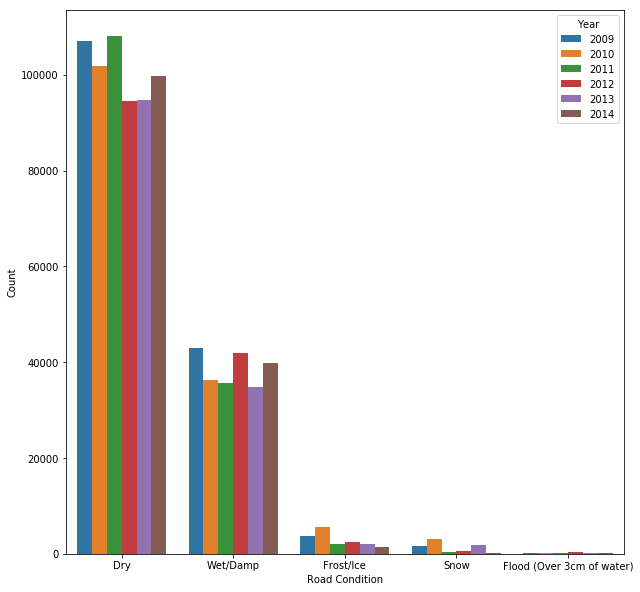

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)

x="Road_Surface_Conditions"
sns.countplot(x, hue="Year", data=df)
plt.xlabel('Road Condition')
plt.xticks(rotation=0)
plt.ylabel('Count')


In [31]:
def plotBox(xx,yy):
    data = pd.DataFrame(df.groupby([xx,yy]).size()).reset_index()
    data_dict = {}
    xvalues=df[xx].unique().tolist()
    for x in xvalues:
        data_dict[x] = list(data[(data[xx]==x)][0])

    plt.figure(figsize=(20,15))
    plt.boxplot(data_dict.values(),showmeans=True)
    locs, labels = plt.xticks()
    labels = data_dict.keys()
    plt.xticks(locs,labels,rotation=0, fontsize=13)
    plt.xlabel(xx)

    plt.show()


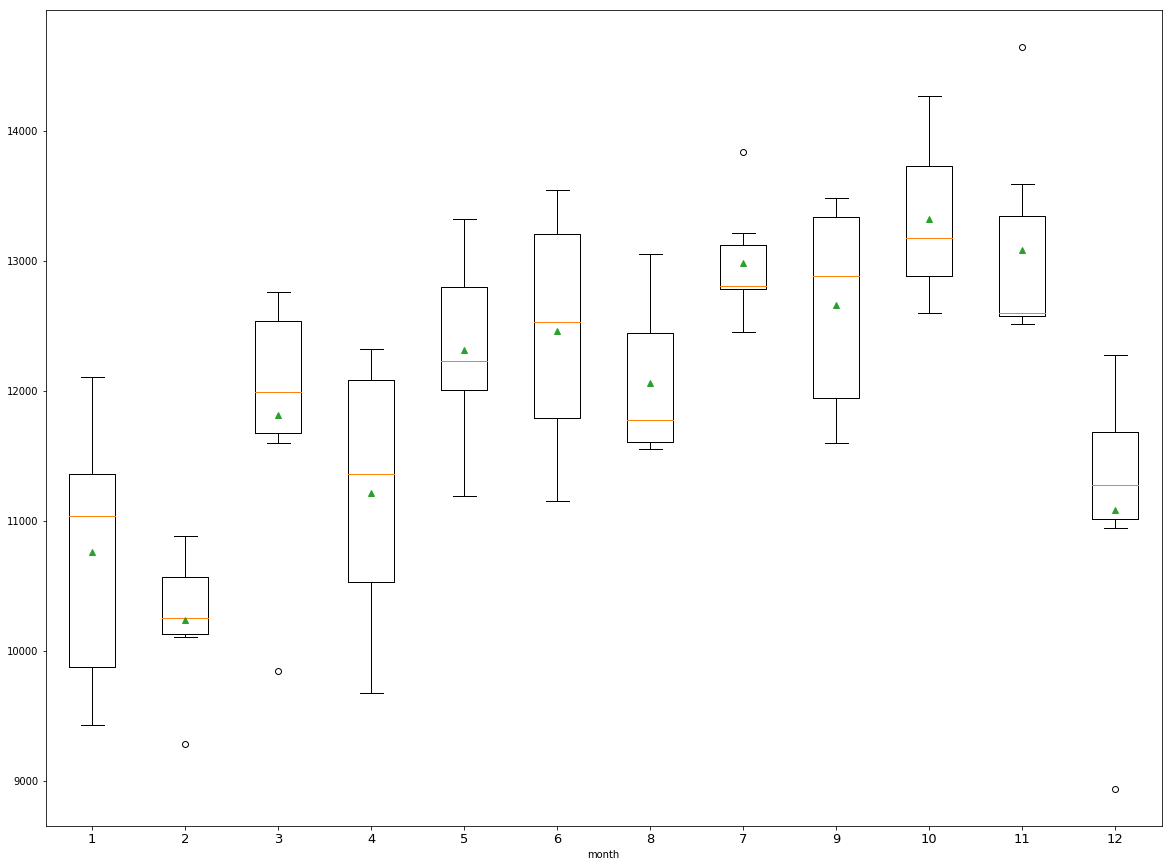

In [32]:
plotBox("month",'Year')

This box plot shows the data distribution of the number of accidents for each month from the year 2009- 2014. In February, the number of accidents is similar for all six years, but two particular years appeared to the outlier. In January and April, the number of accidents is significantly different from year to year. 

## DaylightSaving
In this section, we looked into the DST's impact on traffic accidents.DST day appears as 0 in the table, and the before days appear as -7,-6 -5,... accordingly, similarly the days after the DST appear as 1, 2, 3,4,5,6,7 accordingly. 

In [42]:
# extract the date of DST days from 2009 - 2014
import matplotlib.pyplot as plt
%matplotlib inline
df=df_original
tz = timezone("Europe/Paris")
date_range= list(range(127,139))
dls_dates=[tz._utc_transition_times[i] for i in (date_range)]

In [43]:
def convertDate(date):
    return datetime.strptime(date, '%d/%m/%Y').date()

In [44]:
my_dates = df['Date'].apply(convertDate)
my_datesdf= my_dates.reset_index()

In [45]:
my_dates = df['Date'].apply(convertDate)
my_datesdf=my_dates.reset_index()
dls_dates = [i.date() for i in dls_dates]

dls_lists = []
for d in dls_dates:
    mydates = pd.date_range(d - timedelta(days=7), d+timedelta(days=7))
    test= df.loc[my_datesdf['Date'].isin(mydates.date)]
    dls_incidents = test['Date'].value_counts().reset_index()
    dls_incidents['index'] = dls_incidents['index'].apply(convertDate)
    dls_incidents = dls_incidents.sort_values(by=('index'))
    dls_list = dls_incidents['Date'].tolist()
    dls_lists.append(dls_list)
    
index=list(range(-7,8))
df_=(pd.DataFrame([index, dls_lists[0]]).T)
for i in range(1,len(dls_lists)):

    df_=df_.append(pd.DataFrame([index, dls_lists[i]]).T)

dlsData = pd.DataFrame(dls_lists)
dlsData = dlsData.transpose()

In [46]:
dlsData.rename(columns={0:'March 2009',
                1:'October 2009',
                2:'March 2010',
                3:'October 2010',
                4:'March 2011',
                5:'October 2011',
                6:'March 2012',
                7:'October 2012',
                8:'March 2013',
                9:'October 2013',
                10:'March 2014',
                11:'October 2014',
                          
               }, 
                 inplace=True)
dlsData.rename(index={0:-7,
                      1:-6,
                      2:-5,
                      3:-4,
                      4:-3,
                      5:-2,
                      6:-1,
                      7:0,
                      8:1,
                      9:2,
                      10:3,
                      11:4,
                      12:5,
                      13:6,
                      14:7
                         }, inplace=True)

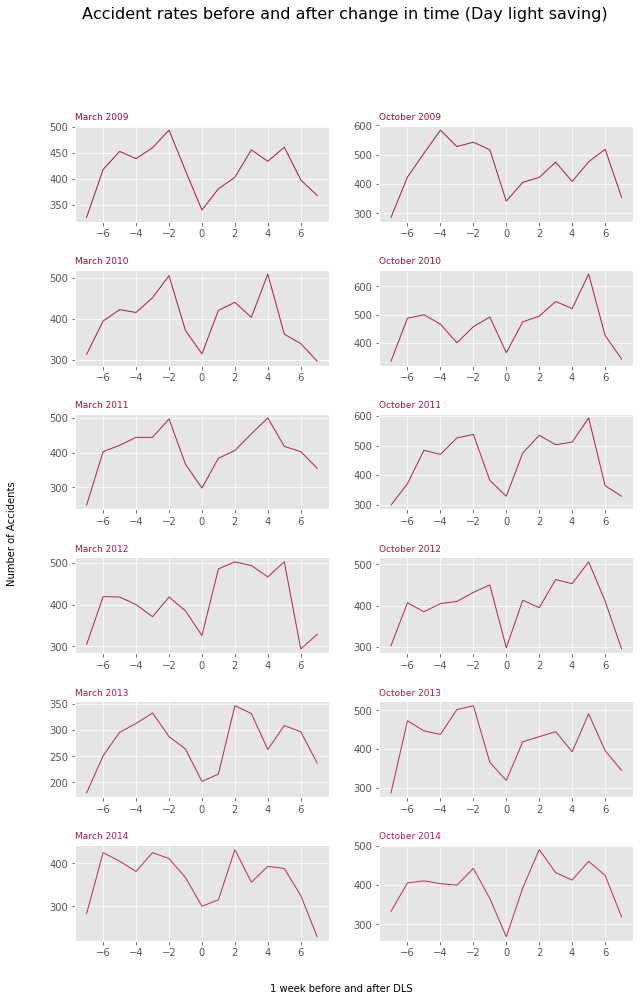

In [47]:
num=0
headers=list(dlsData)

# Initialize the figure
plt.style.use(plt.style.available[5])
 
# create a color palette
palette = plt.get_cmap('Spectral')

for i in range(12):
    num+=1
    plt.subplot(6,2, num)

    
    dlsData.iloc[:,i].plot(kind='line',marker='', color=palette(num), linewidth=1, alpha=0.9, label=i,figsize=(10,15))
    plt.title(headers[i], loc='left', fontsize=9, fontweight=2, color=palette(num) )
    

plt.suptitle("Accident rates before and after change in time (Day light saving)", fontsize=16, fontweight=2, color='black', y=0.99)    
plt.text(-30, 1300, 'Number of Accidents', ha='center', va='center', rotation='vertical')
plt.text(-10, 135, '1 week before and after DLS', ha='center', va='center')
plt.subplots_adjust(hspace=0.5)


We had a theory that the 1 hour less sleep in March and 1 hour extra sleep in October (a courtesy of day light saving) might have some effect on the number of accidents. In order to prove our theory, we have gathered the data and made plots that show number of accidents a week before and after day light saving from 2009 to 2014. The plots cleary show that there is some drastic change in the number of accidents. The interesting thing to note is that on day zero which is the day the time is changed, the number of accidents is lowest. It might be because people are more concious, which contribute to a lower rate of accidents.

European parliament voted in the favor of removing day light saving. However, UK minister intend on having day light saving according to this article: https://news.sky.com/story/eu-votes-to-stop-moving-clocks-twice-a-year-11675731
In our opinion, the number of accidents and other factors should be kept in mind while making this decision.

## 4.Genre
* ###### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why? <br>
    - Visual structureing <br>
        - Consistent visual platform <br>
        In this data visualization project, the team would like to provide a high degree reader-driven exploratory experience for the user. There are several parts included in this visualization, from top to the bottom: a time slider; the map; a historgram shows the city has the most accidents in the selected region; at the bottom, several subgraphs presenting detailed information of the particular selected region. In the subgraph area, the information includes the accident distribution in the month; day; weather condition as well as the road condition. <br>
        Because of the complexity, no strict path designed for this data visualization, to keep the interaction as intuitive as possible, the team decides that the visual feedback should be shown on the same platform.  Each section shows particular types of data, and only the content switches based on the selected filter and desired the geolocation.<br> 
        
        - Timebar <br>
        At the very top of this visualization, there is a time bar available for the user to slide along all six years' data and get the direct visual feedback from the map and histograms down below. If the user wants to have the result from all six years' data, a checkbox is also available for the user, select "Show all six years" then all graphs will updates to all six years data accordingly. <br>
        
    - High lightening <br>
        - Zooming<br>
        The initial screen of this data visualization is the overview of the entire UK map with all districts presented. User can use the touchpad on the laptop to control the zooming, and navigate through the map, find the smaller region. Furthermore, when the mouse hovers on top of the certain district, the area would highlighted, and a popup window shows up displays the name of the district. <br>
     
     
* Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?<br>
    - Odering <br>
        - Random access<br> 
        As aforementioned, in this data visualization, there is no designed path for the user to follow, the interaction is highly reader driven. The purpose of this project is providing a visual tool for the reader to explore the data, trying different combinations to find the significant pattern and insights. The starting point of the visualization is the result based on all six years' data. User can drill down detail information by sliding the timebar, manipulating the filter combinations and so on.  <br>
           
    - Interactivity <br>
        - Hoover details<br>
        Because of the screen real-estate limitation, names for each district would not fit in the map. So on the map, when the mouse hovers on top of a particular region, a popup window would appear, displays the name of the district and general statistics of that district. Besides the hoover function, the area of the district also highlighted when it's been selected. Another reason for providing hoover details function is to let the user quickly filtering desired information without click into unnecessary blocks.  <br>
        
        - Filter/Selection<br>
        As a high level reader driven data visulization, the filter and selection is the essential part of the project. In the origial data set there are 37 column avilable, to simplify the filter selection the team categoprized the columns and provides x filters for the reader such as: x,x,x,x. Besides manipulating the filter combination,     <br>
        - Stimulating Default Views<br>
        Stimulating Default Views is an excellent method for high-level reader-driven data visualization. It provides the basic structure of the visualization, meanwhile presents the user an overview of the capability of the design, help the user understand what are the key parameters, what can be manipulated and what is the outcome.<br>
 
        

## 5.Visualizations
* ###### Explain the visualizations you've chosen.<br>
For this project, the team chose to use interactive annotated graph, which is highly reader-driven and serve as exploration purpose. There is no particular narrative path designed for this project, the user have the freedom to manipulate different filters and select different geolocation to find patterns and insights. The central part of this visualization is the heatmap of all UK districts, by choosing different filters, the reader can get direct feedback from the heatmap, the darker the red, the higher the count of traffic accidents. Underneath the map, several histograms are presenting some detailed information such as the top 50 cities in the selected district, and accidents in different weather or road conditions.  <br>



* ###### Why are they right for the story you want to tell?<br>
As a free exploration data visualization, there is no specific story path that the reader needs to follow. However, the general idea is the reader start with general statistics based on the overview of the entire UK. Then explore and drill detail information based on demands. The center of this visualization project is the map, which is more comfortable for the user to relate to since the dataset is based on geolocation. By selecting regions directly from the map, readers can manipulate several filters to drill down detail information about the selected region.  Various graphs are available for the reader to read our information. Highly reader-driven, exploratory is the essential purpose for the group to chose to use the annotated graph as the median. 




## 6.Discussion
* ###### What went well?
    * From the heatmap,user can easily understand the significant difference regaridng on the traffic accicdents in different region. 
    * By implementing several filters into the heatmap, the reader can drill down detailed information of traffic accidents for each region.  
    * By analyzing the accidents difference on DST, the team found out that the DST potentially can cause more traffic accidents. Due to the reasoning behind it, it relies on other scientific research to investigate. 
  


* ###### What is still missing? What could be improved?, Why?
    * Traffic accident is highly correlated with population, traffic density, or the wealthy difference for each region. To have a deeper understanding of the situation several other datasets are needed, to be the base of analysis. Find the correlation between the elements as mentioned above and the inner relationship. Based on this kind of comprehensive analysis, this data visualization can provide a more subjective overview of traffic accidents. 
    * In the dataset, the speed limit is based on the district rules of the road but not the actual speed the driver was driving, which is a significant factor for causing the accident. Further, the driver's mental and physical condition is unknown. For the accidents in the day of the week, if the drivers mental status is available, then there may be evidence to prove that why Saturday has the most accidents? Maybe is because of drunk driving? 
    
  

## 7.Contributions
You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

* ###### Congzhi Wang <br>
Main responsible for the explainor notebook, participated in the design of the data visulization,data analysis and data cleaning process.

* ###### Johan Weiss Hansen <br>
The main responsible for the map implementation, participated in the deisgn of the data visulization, data analysis and data cleaning process.  

* ###### Muhammad Sultan Tariq <br>
Main responsible for the scatter plot implementation, participated in the design of the data visulization,data analysis and data cleaning process.

## 8.References
* <a href="https://www.who.int/gho/road_safety/mortality/number_text/en/">World Health Organization - Number of road traffic deaths</a>
* <a href="http://www.hvu.dk/SiteCollectionDocuments/HVUdec14_UK_HvorforSkerUlykkerne.pdf"> Danish Road Traffic Accident Investigation Board (AIB) </a>
* <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales"> Original Accident dataset</a>
* <a href="https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland"> Population dataset (2014)</a>
* <a href="https://www.telegraph.co.uk/comment/letters/6495398/Officially-Sunday-is-not-the-first-day-of-the-week.html">Telegraph-UK</a>
* <a href="https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/230596/stats20-2011.pdf"> UK traffic accident report system</a>
* <a href="https://www.timeanddate.com/news/time/eu-votes-scrap-dst.html"> EU Committee Votes to Scrap DST </a>

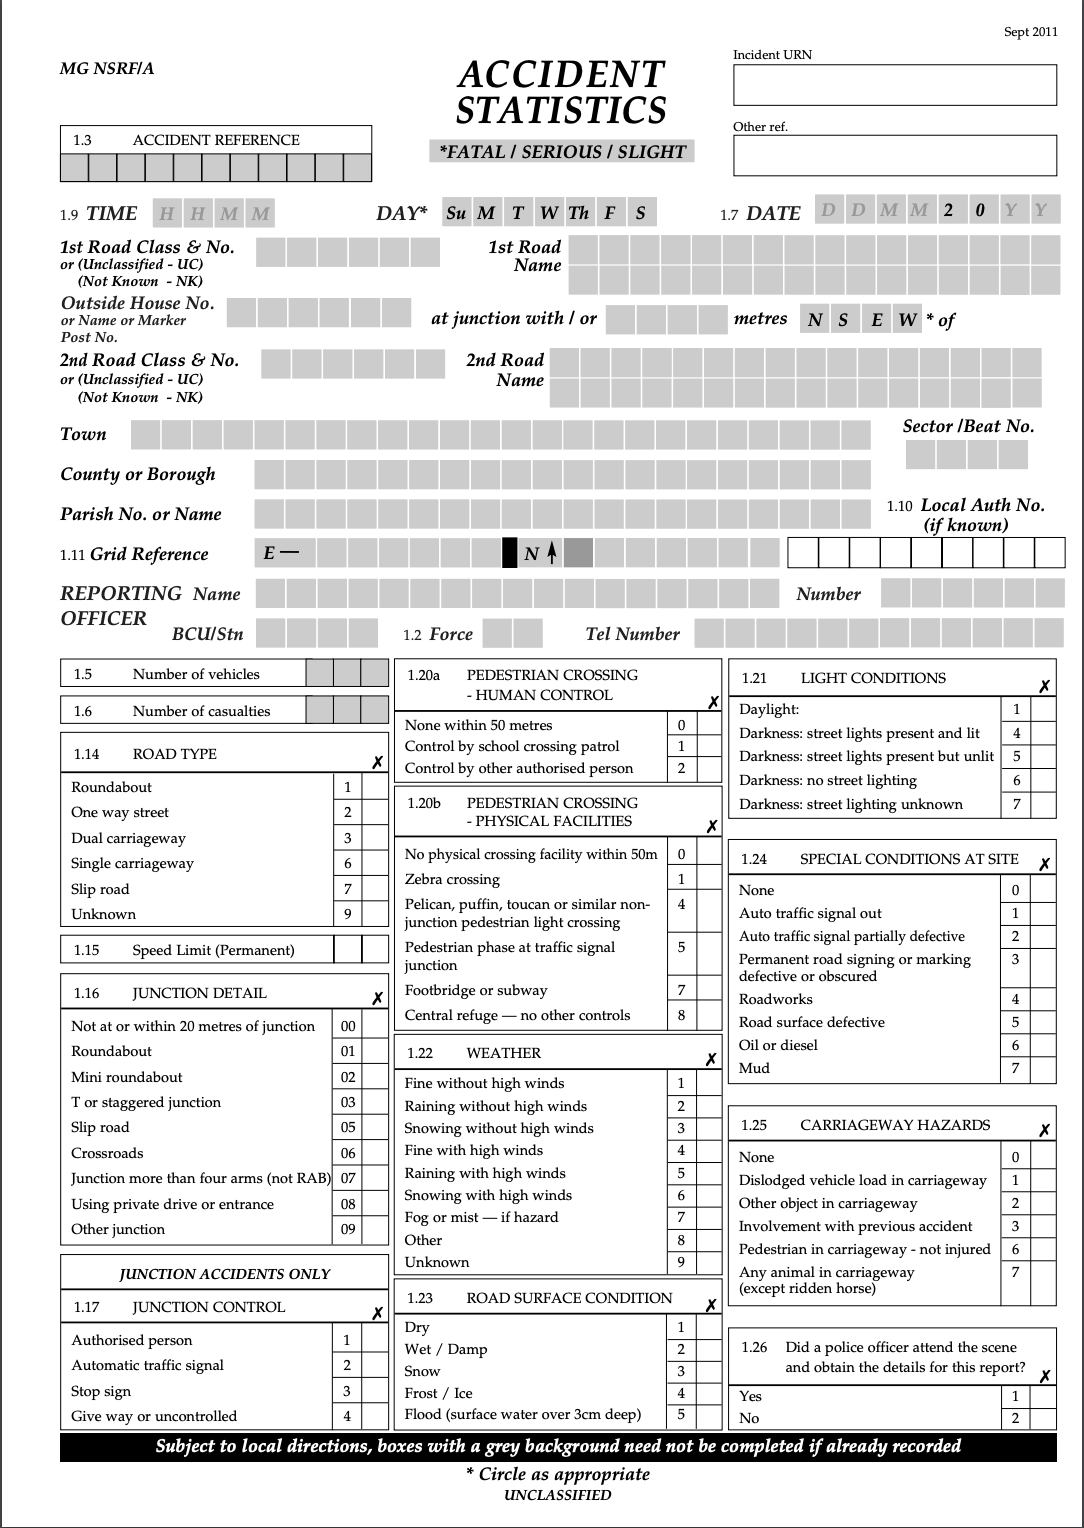

In [48]:
Image(filename="1.png")

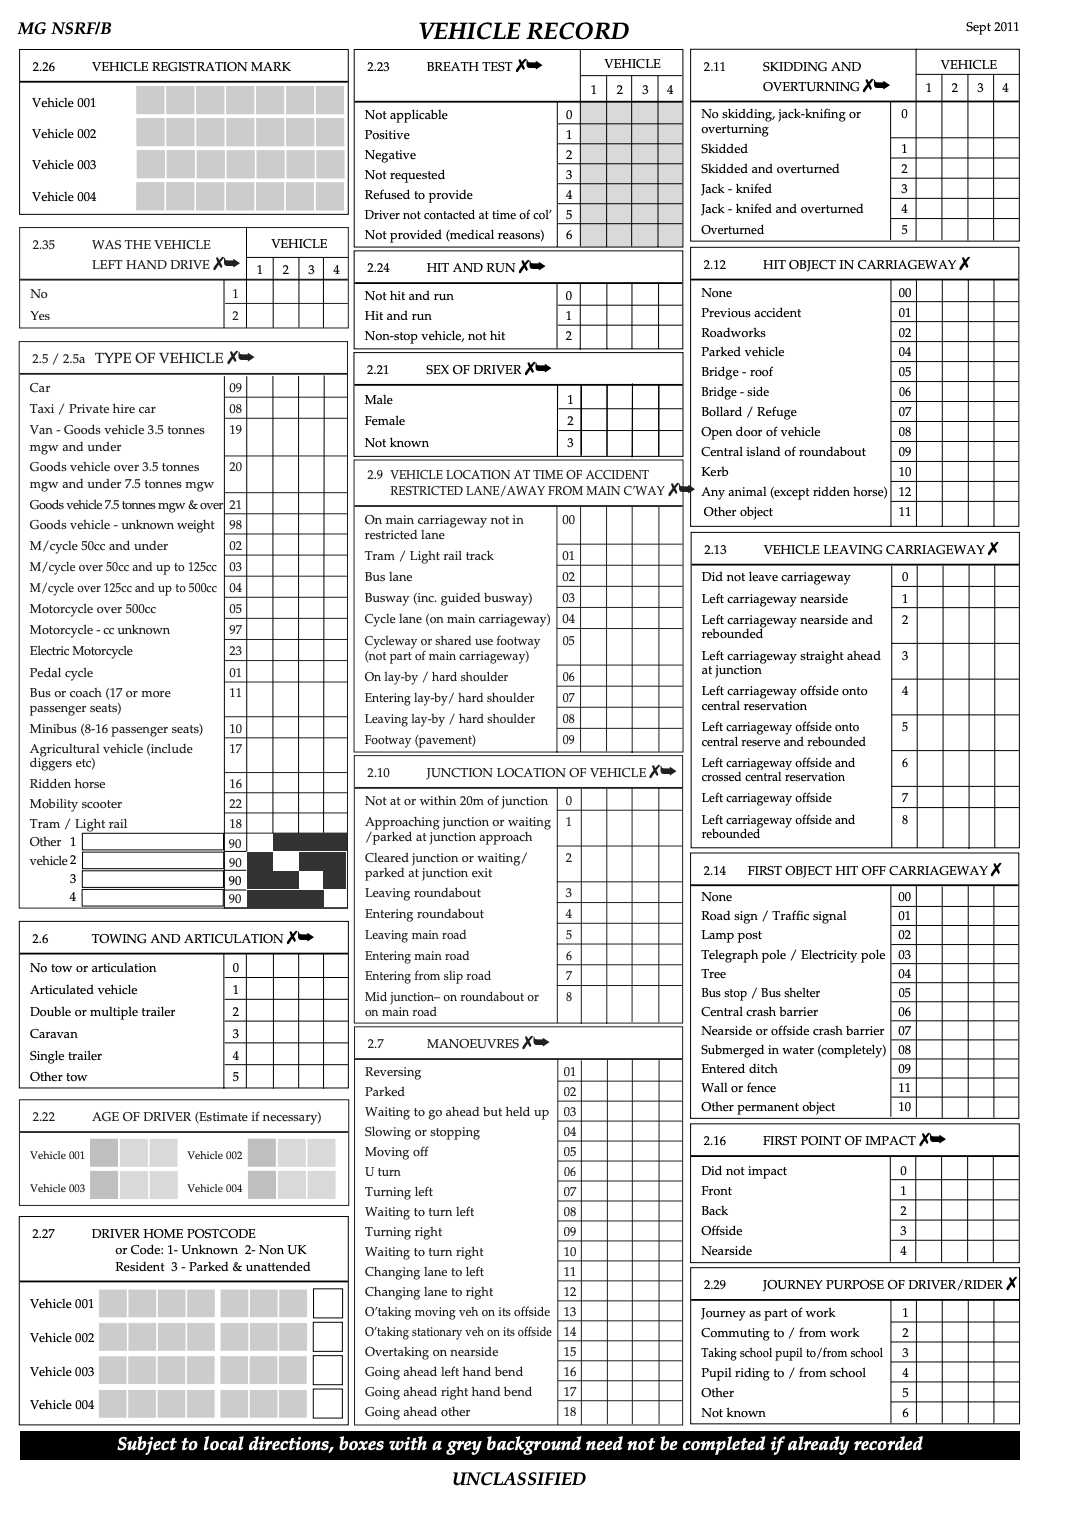

In [49]:
Image(filename="2.png")

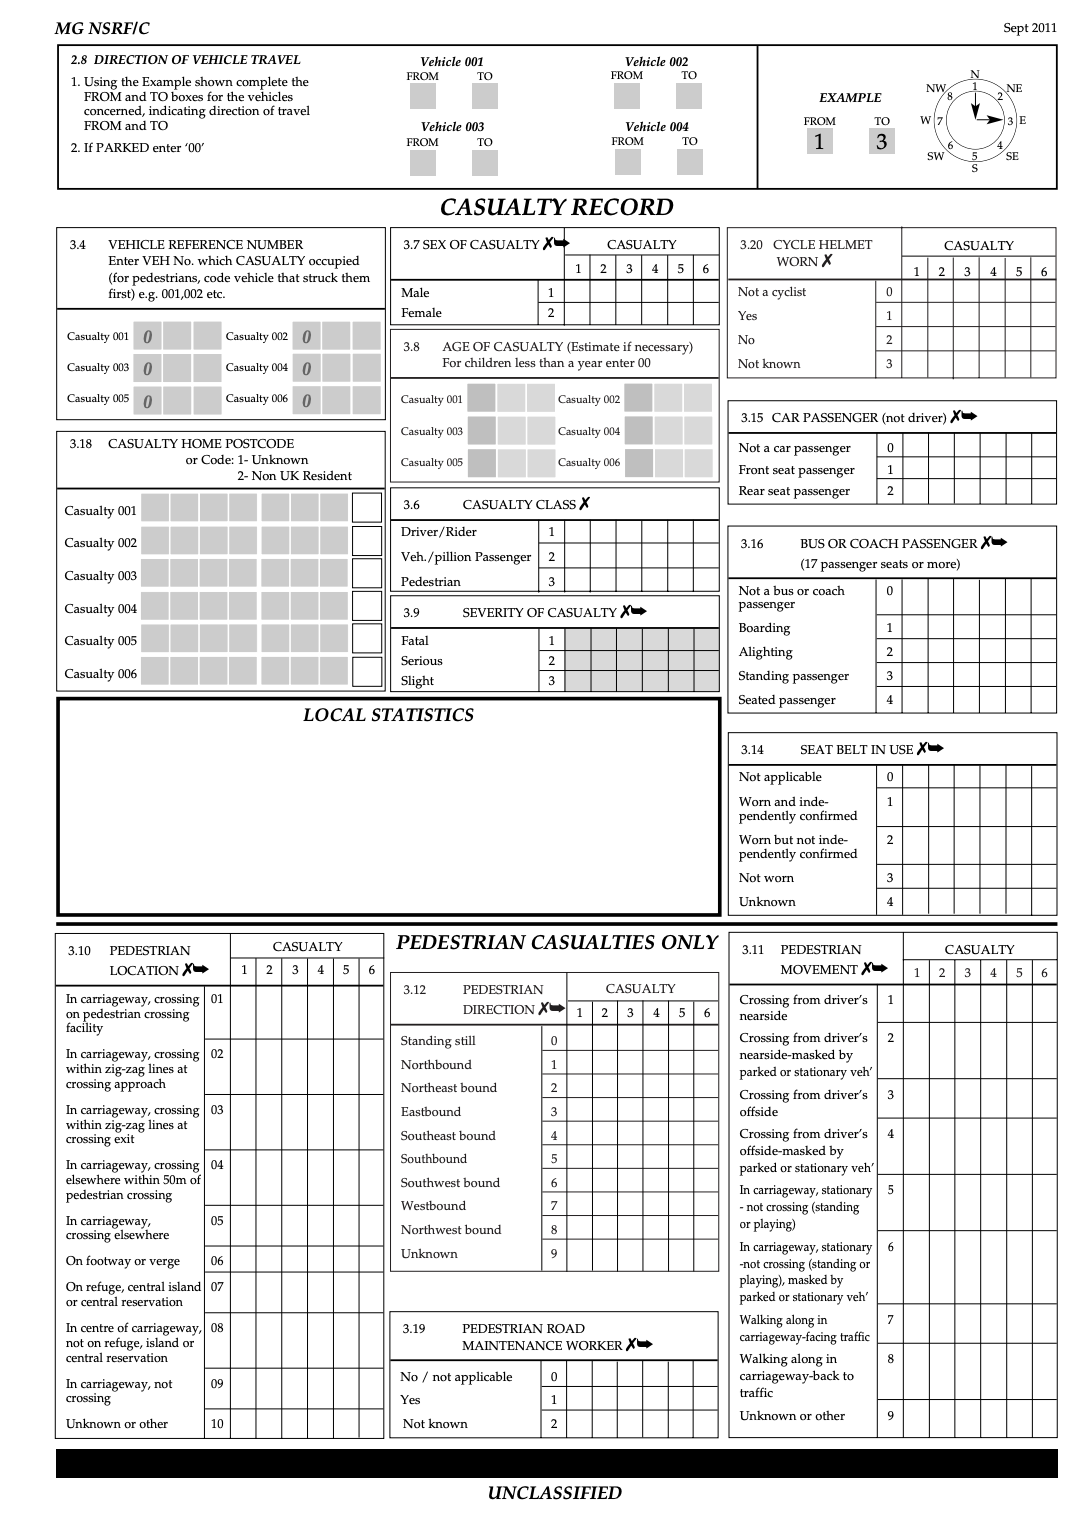

In [50]:
Image(filename="3.png")

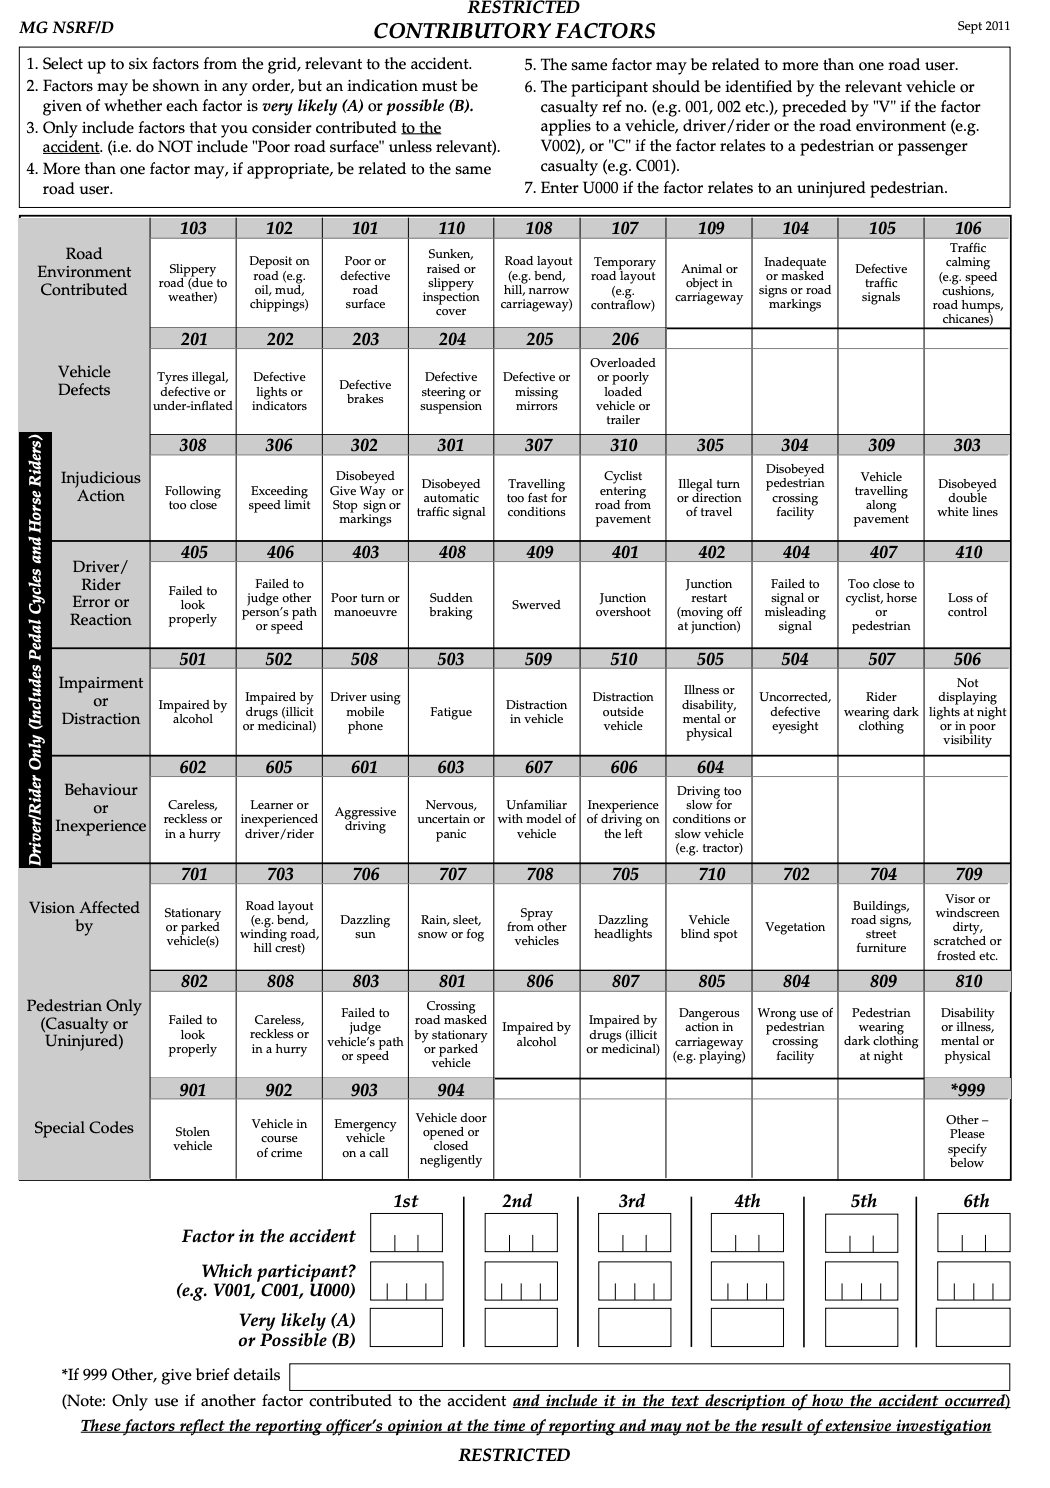

In [51]:
Image(filename="4.png")